In [14]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate

# **Exploring Riemann and Lebesque integrals**



## starting with Riemann-Stieltjes integrals

Useful precusor of the lebesque integral, and an invaluable too in unifying equivalent forms of statistical theorems that apply to discrete and continuous probability theory

#very interesting geometric interpretation!


The Riemann-stieltjes integral of a real-valued function $f$ of a ral variable on the inteval [a,b] with respect to another real-to-real function g is denoted by

$\int _{x=a}^{b}f(x)\,\mathrm {d} g(x) $

Its definition uses a sequence of partitions P of hte interval [a,b]

P = {a = x0 < x1 < x2 < ... < xb = b}

the integral the is defined to be hte limit as hte mesh (length of hte longest subintercal of hte parittions) approaches 0, of the approximating sum

$ S(P,f,g)=\sum _{i=0}^{n-1}f(c_{i})\left[g(x_{i+1})-g(x_{i})\right] $

ci is in hte ith subinteral [xi,xi+1]. The 2 function f and g are respectively called teh integrand and hte integrator.

Typically g is taken to be monotone (or at least with bounded variation) and right semicontinuous (this is just convention)

We specifically do not require g to be continuous, which allows for integrals that have point mass terms

In [37]:
# quick little test - validity with a continuous function
def f(x):
    return x**2

def g1(x):
    return x**3 + x - 0.15*x**3


x1 = 0
xn = 4
n = 1000

#partitions
P = np.linspace(x1,xn,n)

#riemman-stieltjes integral
#set ci to be the start of the interval
rs = [ f(xi )*(g1(xiplus1)-g1(xi)) for xi,xiplus1 in zip(P[:-1],P[1:])  ] #quite pretty python code

#ideally g shouls be monotonous

#analytical solution
Y = f(P)*g1(P)

#f(x)g'(x)dx
print(scipy.integrate.quad(lambda x: x**2 * (3*x**2 + 1 -0.45*x**2) ,x1,xn))

print(sum(rs))





(543.5733333333334, 6.034876302389118e-12)
542.8877133969564


IT WORKS!!!

In [9]:
X = [i for i in range(11)]
X
print(X[:-1])
print(X[1:])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Lebesque integration

"I have to pay a certain sum, which I have collected in my pocket. I take the bills and coins out of my pocket and give them to the creditor in the order I find them until I have reached the total sum. This is the Riemann integral. But I can proceed differently. After I have taken all the money out of my pocket I order the bills and coins according to identical values and then I pay the several heaps one after the other to the creditor. This is my integral."

instead we partition the DOMAIN Of f (the y axis) and define a simple function which sits under f 

Supremum of this is hte lebesque integral (for a continuous function, this will be when we take infinitely small partitions of y), 

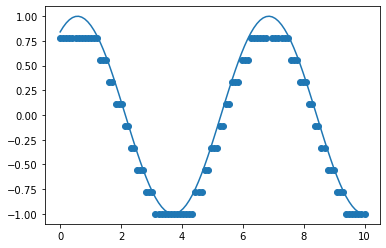

In [92]:
X = np.linspace(0,10,100)
def f(x):
    return np.sin(x+1)

Y = f(X)


#partition Y inteval
n = 10
P = np.linspace(min(Y),max(Y),n)

#create boolean arrays corresponding to the preimages that fall in a given interval

# could make loops faster by deleting elements once they have been used but tbh...
#using loops in python is CRINGE - we need to vectorize
#too lazy to do this right now
Ais = []
for i,j in zip(P[:-1],P[1:]):
    Ai = []
    for x,y in zip(X,Y):
        if y >= i and y < j:
            Ai.append(x) 
    Ais.append(Ai)

#use the set of subsets to creat a simple function
y_plot = [ [y]*len(Ai) for y,Ai in zip(P[:-1],Ais)]


#flatten a list - beautiful code from rightfootinblog 
# http://rightfootin.blogspot.com/2006/09/more-on-python-flatten.html
def flatten(l, ltypes = (list,tuple)):
    ltype = type(l) #tells flatten where we are dealing with a list or a tuple
    l = list(l) #converts into a list
    i = 0
    while i < len(l): #iterates through the list
        while isinstance(l[i], ltypes): #checks that the list element is a list or a tuple
            if not l[i]: #empty list check
                l.pop[i] #removes empty list
                i -= 1 #reset counter to avoid missing elements
                break
            else: #if not empty list
                l[i:i+1] = l[i] #VERY INTERERESTING BEHAVIOUR WITH INDEXIN SYNTAX
                # [i] returns element i
                # [i:i] return empty list
                # [i:i+1] returns the iths element but as a list! 
                
                # so assigning onto this interval we can instert arbitrarily many values 
                # into the list

                #WOWOWOWOWO - nive python underpinnings, must take advantage how how lists
                # are actually defined in python

                # lists are an array of pointers which point to objects (can be other list)

                # I dont really understand how this words in memoery but conveptually it akes sense
                # we replace the list of hte first element with a list which python then unpacks 
                # into elemnts - RESIZING if you add an element python will find a new block in hte memory
                # and copy all of hte "pointers" to that new memory - now we trick python into copying the 
                # pointers of list l[i] rather than the pointer TO list l[i]
        i += 1
    return ltype(l)

y_flat = flatten(y_plot)
x_flat = flatten(Ais)



fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X,Y)
ax.scatter(x_flat,y_flat)

# THIS WORKS REALLY WELLL!!!

In [90]:
y_flat

[0.0,
 0.0,
 0.0,
 0.0,
 0.26643280808870784,
 0.26643280808870784,
 0.26643280808870784,
 0.5328656161774157,
 0.5328656161774157,
 0.5328656161774157,
 0.5328656161774157,
 0.5328656161774157,
 0.5328656161774157,
 0.7992984242661235,
 0.7992984242661235,
 0.7992984242661235,
 0.7992984242661235,
 0.7992984242661235,
 0.7992984242661235,
 1.0657312323548314,
 1.0657312323548314,
 1.0657312323548314,
 1.0657312323548314,
 1.0657312323548314,
 1.0657312323548314,
 1.0657312323548314,
 1.0657312323548314,
 1.0657312323548314,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.3321640404435393,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.598596848532247,
 1.59859684853224